### Edgar Moises Hernandez-Gonzalez
#### 29/03/20-03/04/20
#### Clasificacion de CIFAR10 con Transfer Learning usando VGG16
##### Esta es otra manera de hacer Transfer Learning pero no se recomienda ya que tiene un alto costo computacional y es mejor solo predecir para obtener la extraccion de caracteristicas
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 61.03%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [7]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=x_train.shape[1:])

58892288/58889256 [==============================] - 1s 0us/step


In [8]:
for layer in base_model.layers[:]:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc918ef4cf8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc89b1f0e48> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc89a983fd0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc89a128390> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc89a153c18> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc8903130b8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc89031c550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc89031c3c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc890324710> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc89032c8d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc8903337f0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

optimizer = Adam(lr=1e-4)
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs=200, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/200
391/391 - 12s - loss: 2.1401 - accuracy: 0.2297 - val_loss: 1.8690 - val_accuracy: 0.3823
Epoch 2/200
391/391 - 11s - loss: 1.7869 - accuracy: 0.3822 - val_loss: 1.6455 - val_accuracy: 0.4528
Epoch 3/200
391/391 - 11s - loss: 1.6357 - accuracy: 0.4331 - val_loss: 1.5429 - val_accuracy: 0.4809
Epoch 4/200
391/391 - 11s - loss: 1.5566 - accuracy: 0.4593 - val_loss: 1.4787 - val_accuracy: 0.4990
Epoch 5/200
391/391 - 11s - loss: 1.5000 - accuracy: 0.4807 - val_loss: 1.4341 - val_accuracy: 0.5143
Epoch 6/200
391/391 - 11s - loss: 1.4577 - accuracy: 0.4931 - val_loss: 1.4021 - val_accuracy: 0.5214
Epoch 7/200
391/391 - 11s - loss: 1.4261 - accuracy: 0.5062 - val_loss: 1.3758 - val_accuracy: 0.5300
Epoch 8/200
391/391 - 11s - loss: 1.3964 - accuracy: 0.5157 - val_loss: 1.3553 - val_accuracy: 0.5341
Epoch 9/200
391/391 - 11s - loss: 1.3792 - accuracy: 0.5213 - val_loss: 1.3354 - val_accuracy: 0.5398
Epoch 10/200
391/391 - 11s - loss: 1.3584 - accuracy: 0.5299 - val_loss: 1.3201 - 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 1.1196 - accuracy: 0.6103
Test loss: 1.1195659637451172
Test accuracy: 0.6103000044822693


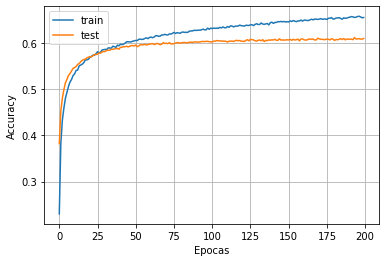

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

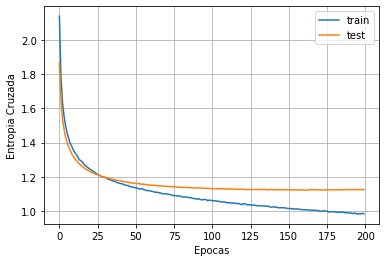

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [16]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[701  29  53  17  12  12   7  29  97  43]
 [ 30 685  18  39  10  16  21  19  41 121]
 [ 73  19 493  78 107  57 101  43  13  16]
 [ 23  41  60 436  64 154 106  39  24  53]
 [ 22  12  82  61 551  27 102 100  27  16]
 [ 13  16  67 186  59 514  43  60   6  36]
 [  9  23  55  74  78  43 681   8   8  21]
 [ 22  11  46  46  83  58   9 674   7  44]
 [ 76  63  16  20  21   5  10   7 719  63]
 [ 38 131  10  27  17  24  16  42  46 649]]


In [17]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.67      0.69      0.67      1000
           2       0.55      0.49      0.52      1000
           3       0.44      0.44      0.44      1000
           4       0.55      0.55      0.55      1000
           5       0.56      0.51      0.54      1000
           6       0.62      0.68      0.65      1000
           7       0.66      0.67      0.67      1000
           8       0.73      0.72      0.72      1000
           9       0.61      0.65      0.63      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000

